# Notebook del Curso completo de NLP Parte 3

Link al video de youtube:  
https://www.youtube.com/watch?v=9x1QtYNLJRY&list=PL7HAy5R0ehQVdPVLV6pIJA9ZE2vVyLRxX&index=1


## Similitud de vectores

La similitud de vectores es un concepto fundamental en el Procesamiento del Lenguaje Natural (NLP) que se utiliza para medir qué tan relacionados están dos elementos (como palabras, documentos o frases) representados como vectores numéricos en un espacio multidimensional.

En NLP, las técnicas como Word2Vec, GloVe o modelos más avanzados como BERT transforman el texto en estos vectores, llamados **embeddings**, donde el significado y el contexto se codifican a través de la posición y la distancia entre ellos.

### Aplicaciones

- Búsqueda Semántica y Sistemas de Recuperación de Información: Permite encontrar documentos o resultados de búsqueda que no solo contengan las palabras clave exactas, sino que también sean conceptualmente similares a la consulta del usuario.

- Recomendación: Se utiliza para encontrar artículos, películas o productos que son "similares" a los que el usuario ha disfrutado previamente, basándose en la similitud de sus representaciones vectoriales.

- Clustering y Agrupación de Textos: Agrupa automáticamente documentos o frases que discuten el mismo tema o expresan ideas similares.

- Traducción Automática: Ayuda a encontrar las representaciones vectoriales de palabras o frases que son equivalentes en diferentes idiomas.

- Detección de Plagio: Compara la similitud de los vectores de diferentes documentos para identificar texto copiado o parafraseado.

### Medición de Similitud

Cabe aclarar que esta sección no es parte de una práctica habitual ya que las librerías de python lo hacen sin que se interfiera en los paramétros.

La forma más común y efectiva de medir la similitud entre dos vectores, $\mathbf{A}$ y $\mathbf{B}$, es el coseno de la similitud ($cos(\theta)$). Este método calcula el coseno del ángulo entre los dos vectores, indicando su orientación, sin importar su magnitud.

$$cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{||\mathbf{A}|| \cdot ||\mathbf{B}||}$$

- Un valor de 1 significa que los vectores son idénticos en dirección (máxima similitud).

- Un valor de 0 significa que son ortogonales o no tienen relación.

- Un valor de -1 significa que son opuestos.




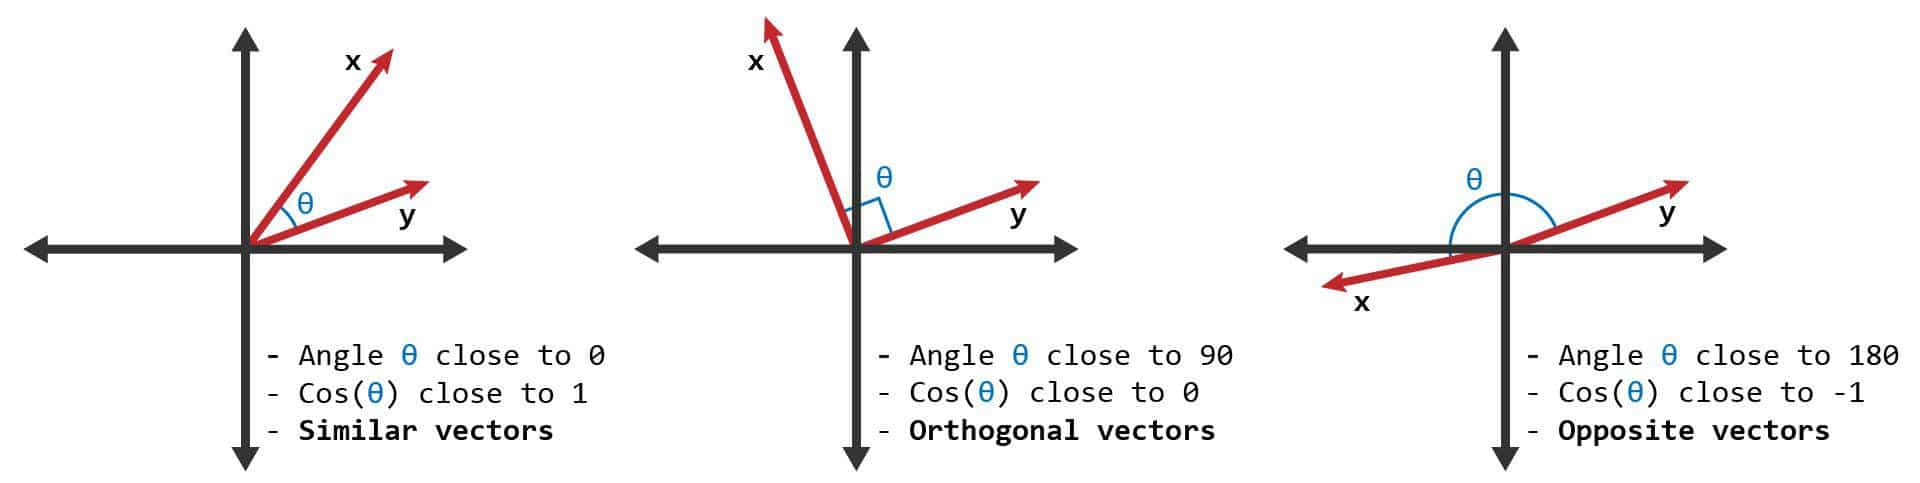

# Método de TF-IDF

El TF-IDF (Term Frequency-Inverse Document Frequency) es una técnica de ponderación estadística utilizada en el procesamiento de lenguaje natural (PLN) y la recuperación de información. Su principal objetivo es reflejar la importancia de un término dentro de un documento o una colección de documentos.

## Cómo Funciona el TF-IDF
1. El cálculo del TF-IDF se basa en la combinación de dos métricas:1. Frecuencia del Término (TF)Mide la frecuencia con la que un término ($t$) aparece en un documento ($d$).Cuanto más a menudo aparece un término en un documento, mayor será su importancia dentro de ese documento.Una formulación común es:

$$\text{TF}(t, d) = \frac{\text{Número de veces que } t \text{ aparece en } d}{\text{Número total de términos en } d}$$

2. Frecuencia Inversa del Documento (IDF)Mide la importancia general del término a través de toda la colección de documentos ($N$).Se basa en el principio de que los términos que aparecen en muchos documentos (como "el", "la", "un", "y") tienen poco valor informativo y deben ser penalizados.Los términos raros (que aparecen en pocos documentos) son más distintivos y reciben un IDF más alto.La formulación es:
$$\text{IDF}(t, N) = \log \left( \frac{\text{Número total de documentos } (N)}{\text{Número de documentos que contienen } t} \right)$$

3. Ponderación FinalEl valor TF-IDF se obtiene multiplicando el TF por el IDF.
$$\text{TF-IDF}(t, d, N) = \text{TF}(t, d) \times \text{IDF}(t, N)$$En resumen: Un alto valor de TF-IDF se logra cuando un término aparece muchas veces en un documento específico (alto TF), pero pocas veces en el resto de la colección de documentos (alto IDF).

### ¿Por Qué se Utiliza?
Se utiliza para resolver un problema fundamental en el análisis de texto: distinguir entre palabras importantes y palabras comunes (stopwords). No todas las palabras comunes son stopwords, en un ánalisis de sentimiento el "no" puede ser clave.

Si solo se usara TF, las palabras como "de", "un" o "el" dominarían el documento debido a su alta frecuencia, pero no dirían nada sobre el tema del documento.

IDF actúa como un filtro, reduciendo significativamente la importancia de estas palabras comunes y amplificando la de las palabras clave que realmente definen el contenido del documento.

### Librerías que se utilizan



#### 1. Scikit-learn: La Solución Estándar (TfidfVectorizer)

Scikit-learn es la forma más directa y recomendada. La clase TfidfVectorizer se encarga de todo: tokenización, conteo de frecuencias de término (TF), cálculo de frecuencias inversas de documento (IDF) y la multiplicación final.

In [1]:
# Nuestro Corpus de ejemplo
documentos = [
    "El perro corre y juega en el parque",
    "El gato duerme todo el dia en la casa",
    "Perro y gato son animales domesticados",
    "El parque esta lleno de perros y gatos"
]

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

print("--- Scikit-learn: TfidfVectorizer ---")

# 1. Crear el vectorizador TF-IDF
# Se pueden configurar stop_words, n-gramas, y más
vectorizer = TfidfVectorizer(stop_words='english')

# 2. Aplicar el vectorizador a los documentos
# La funcion .fit_transform() calcula el TF-IDF y lo convierte en una matriz
tfidf_matrix = vectorizer.fit_transform(documentos)

# 3. Mostrar los resultados (opcional: en un DataFrame para mayor claridad)
feature_names = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

print("\nMatriz TF-IDF generada:")
print(df_tfidf)

--- Scikit-learn: TfidfVectorizer ---

Matriz TF-IDF generada:
   animales      casa     corre       dia  domesticados    duerme        el  \
0  0.000000  0.000000  0.426618  0.000000      0.000000  0.000000  0.544609   
1  0.000000  0.356398  0.000000  0.356398      0.000000  0.356398  0.454968   
2  0.485461  0.000000  0.000000  0.000000      0.485461  0.000000  0.000000   
3  0.000000  0.000000  0.000000  0.000000      0.000000  0.000000  0.284626   

         en      esta      gato     gatos     juega        la     lleno  \
0  0.336350  0.000000  0.000000  0.000000  0.426618  0.000000  0.000000   
1  0.280988  0.000000  0.280988  0.000000  0.000000  0.356398  0.000000   
2  0.000000  0.000000  0.382743  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.445922  0.000000  0.445922  0.000000  0.000000  0.445922   

    parque     perro    perros       son      todo  
0  0.33635  0.336350  0.000000  0.000000  0.000000  
1  0.00000  0.000000  0.000000  0.000000  0.356398  
2  0.0

#### 2. NLTK: Preprocesamiento

Aunque NLTK no tiene una implementación directa y eficiente para el cálculo final del TF-IDF como TfidfVectorizer, es crucial para el preprocesamiento que a menudo se realiza antes de aplicar cualquier modelo de NLP.

Usaremos NLTK para lematizar (reducir palabras a su forma base), lo que mejora la precisión del TF-IDF.

Nota:

    Si bien NLTK tiene módulos para el conteo de términos, Scikit-learn es preferido por su implementación directa del cálculo TF-IDF vectorizado y su integración con otros algoritmos de Machine Learning.



In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

print("\n--- NLTK: Preprocesamiento (Lematización) ---")

nltk.download('wordnet', quiet=True)
nltk.download('stopwords', quiet=True)
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('spanish'))

def preprocess_text(text):
    # 1. Tokenización (separar en palabras) y limpieza
    text = re.sub(r'[^\w\s]', '', text.lower()) # Elimina puntuación
    tokens = text.split()

    # 2. Eliminación de Stop Words y Lematización
    processed_tokens = [
        lemmatizer.lemmatize(word) for word in tokens if word not in stop_words
    ]
    return " ".join(processed_tokens)

# Aplicar el preprocesamiento de NLTK
documentos_preprocesados = [preprocess_text(doc) for doc in documentos]

print("Documento 1 original:", documentos[0])
print("Documento 1 lematizado y limpio:", documentos_preprocesados[0])

# Ahora se podría alimentar 'documentos_preprocesados' a TfidfVectorizer


--- NLTK: Preprocesamiento (Lematización) ---
Documento 1 original: El perro corre y juega en el parque
Documento 1 lematizado y limpio: perro corre juega parque


#### 3. Gensim

Gensim es una librería especializada en modelado de temas (topic modeling) y recuperación de información (information retrieval). Es especialmente útil cuando se trabaja con colecciones de documentos muy grandes.

- Clase principal: TfidfModel

  Requiere que los datos ya hayan sido tokenizados y contados (generalmente usando Dictionary y Corpus de Gensim) antes de aplicar el modelo TF-IDF.

- Ventaja: Está optimizada para manejar grandes volúmenes de datos y trabajar con modelos de topic modeling como LSA (Latent Semantic Analysis) y LDA (Latent Dirichlet Allocation).

In [5]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 79.8 MB/s eta 0:00:00


In [6]:
from gensim.corpora import Dictionary
from gensim.models import TfidfModel

print("\n--- Gensim: TfidfModel ---")

# 1. Tokenizar los documentos (necesario para Gensim)
tokenized_docs = [doc.lower().split() for doc in documentos]

# 2. Crear un diccionario (mapea cada palabra a un ID)
diccionario = Dictionary(tokenized_docs)

# 3. Crear el Corpus (Bolsa de Palabras - BoW)
# Cada documento es representado como una lista de (ID, Conteo)
corpus_bow = [diccionario.doc2bow(doc) for doc in tokenized_docs]

# 4. Entrenar el modelo TF-IDF con el Corpus BoW
# El modelo calcula los pesos IDF a partir de los documentos
tfidf_model = TfidfModel(corpus_bow)

# 5. Aplicar el modelo TF-IDF al Corpus BoW
corpus_tfidf = tfidf_model[corpus_bow]

# 6. Mostrar el resultado del primer documento
print("Resultado TF-IDF del Documento 1 (ID, Peso TF-IDF):")
print(corpus_tfidf[0])


--- Gensim: TfidfModel ---
Resultado TF-IDF del Documento 1 (ID, Peso TF-IDF):
[(0, np.float64(0.5807165524356012)), (1, np.float64(0.24101914571270341)), (2, np.float64(0.2903582762178006)), (3, np.float64(0.5807165524356012)), (4, np.float64(0.2903582762178006)), (5, np.float64(0.2903582762178006)), (6, np.float64(0.12050957285635171))]
